In [47]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 17

import seaborn as sns
import re
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
sns.set(style="ticks", color_codes=True)

## 2. Preprocesing B
### 2.1 Reinspect Data

In [48]:
data = pd.read_csv('../app/data/wrangled_data.csv')
# 2.2.1 Inspect Table
data.info(memory_usage='deep')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     1395 non-null   object 
 1   location    1395 non-null   object 
 2   rating      1395 non-null   float64
 3   job_title   1395 non-null   object 
 4   text        1395 non-null   object 
 5   salary      1128 non-null   float64
 6   dateposted  1395 non-null   object 
 7   state       1395 non-null   object 
 8   city        1395 non-null   object 
dtypes: float64(2), object(7)
memory usage: 11.2 MB


,company,location,rating,job_title,text,salary,dateposted,state,city
0,online technical services,remote,3.7,data scientist - marketing,"job descriptiondata scientist, marketingsan di...",147500.0,2022-04-13,remote,remote
1,west cap,"remote in new york, ny+2 locations",3.5,"data scientist, botguard",human was founded in 2012 in a brooklyn sci-fi...,114144.0,2022-04-13,ny,remote in new york
2,maya ai inc.,remote,0.0,data scientist,our maya team is expanding and we are looking ...,130588.0,2022-04-13,remote,remote
3,"emergetech, inc",remote,0.0,data scientist,description:job categorydata scienceabout emer...,947120.0,2022-04-13,remote,remote
4,recurrent,"remote in seattle, wa",0.0,data scientist,what's the opportunity?recurrent is on a missi...,119151.0,2022-04-13,wa,remote in seattle


From the info table I can see that the only missing values are for the Salary target feature.However, for duplicates it would 'seem' that almost all of my data is duplicated.\
It appears this way because an absolutely distinguishing feature has been removed, the url. That's what these duplicates are, individual records for multiple openings (records/observations,singular data). How this affects NLP and ML will be part of the ongoing discovery process.

In [50]:
print(data.company.unique()[:10])

['online technical services' 'west cap' 'maya ai inc.' 'emergetech, inc'
 'recurrent' 'fractal.ai' 'techtrueup' 'eab' 'ford motor company' 'redfin']


In [11]:
data.describe(include='all')

,company,location,rating,job_title,text,salary,dateposted,state,city
count,1515,1515,1515.000000,1515,1515,1210.000000,1515,1515,1515
unique,97,83,NaN,88,173,NaN,7,30,51
top,sparkcognition,remote,NaN,data scientist,we are currently seeking a senior data scienti...,NaN,2022-04-16,remote,remote
freq,80,386,NaN,348,68,NaN,381,386,386
mean,NaN,NaN,2.521980,NaN,NaN,281597.949587,NaN,NaN,NaN
std,NaN,NaN,1.779933,NaN,NaN,266911.570832,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,53672.000000,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,120000.000000,NaN,NaN,NaN
50%,NaN,NaN,3.500000,NaN,NaN,145000.000000,NaN,NaN,NaN
75%,NaN,NaN,3.900000,NaN,NaN,448000.000000,NaN,NaN,NaN


In [54]:
(114 + 144)/2

129.0

### 2.2 Univariate Feature Analysis & Centering
I'm going to employ visual and statistical methods to analyze each feature, starting with the target, and outside of scaling, prepare them for logistic regression which will require that each feature's vaues are normally distributes.


### 2.2a Target

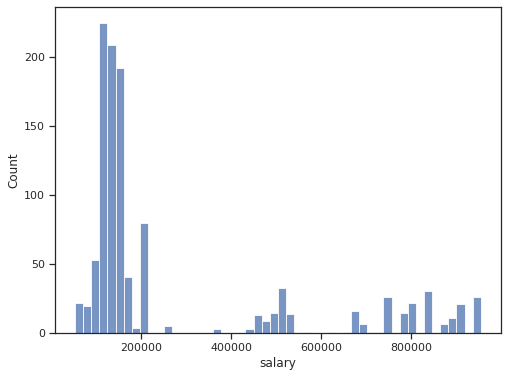

In [51]:
sns.histplot(x='salary', data=data, bins=50)
plt.show()

In [45]:
data[data.salary == 53672]

,company,location,rating,job_title,text,salary,dateposted,state,city
333,cambium assessment,remote,2.0,data analyst i,"we are cambium assessment, a cambium learni...",53672.0,2022-04-14,remote,remote
362,cambium assessment,remote,2.0,data analyst i,"we are cambium assessment, a cambium learni...",53672.0,2022-04-14,remote,remote
378,cambium assessment,remote,2.0,data analyst i,"we are cambium assessment, a cambium learni...",53672.0,2022-04-14,remote,remote
408,cambium assessment,remote,2.0,data analyst i,"we are cambium assessment, a cambium learni...",53672.0,2022-04-14,remote,remote
423,cambium assessment,remote,2.0,data analyst i,"we are cambium assessment, a cambium learni...",53672.0,2022-04-14,remote,remote
453,cambium assessment,remote,2.0,data analyst i,"we are cambium assessment, a cambium learni...",53672.0,2022-04-15,remote,remote
482,cambium assessment,remote,2.0,data analyst i,"we are cambium assessment, a cambium learni...",53672.0,2022-04-15,remote,remote
498,cambium assessment,remote,2.0,data analyst i,"we are cambium assessment, a cambium learni...",53672.0,2022-04-15,remote,remote
528,cambium assessment,remote,2.0,data analyst i,"we are cambium assessment, a cambium learni...",53672.0,2022-04-15,remote,remote
543,cambium assessment,remote,2.0,data analyst i,"we are cambium assessment, a cambium learni...",53672.0,2022-04-15,remote,remote


In [46]:
data[data.salary == 954121]

,company,location,rating,job_title,text,salary,dateposted,state,city
1497,lucid technologies inc,"remote in dallas, tx",0.0,information security data scientist (remote),job title: information security data scientist...,954121.0,2022-04-20,tx,remote in dallas


In [2]:

data.drop(['location','dateposted'],inplace=True,axis=1)

In [32]:
i = 'company'
print(data[i].value_counts())
print(data[i].unique())



sparkcognition                       80
comcentric                           69
target                               59
etsy                                 52
ericsson                             50
                                     ..
pcs global tech                       1
obxtek inc.                           1
compugain                             1
the american college of radiology     1
claritas llc                          1
Name: company, Length: 97, dtype: int64
['online technical services' 'west cap' 'maya ai inc.' 'emergetech, inc'
 'recurrent' 'fractal.ai' 'techtrueup' 'eab' 'ford motor company' 'redfin'
 'sparkcognition' 'coderpad, inc.' 'humana' 'amadeus'
 'the american college of radiology' 'insight global' 'ibm' 'cybercoders'
 'calculated hire' 'compugain' 'liberty mutual insurance' 'comcentric'
 'edward jones' 'vital connect, inc.' 'updater' 'cambium assessment'
 'optum' 'opal' 'home depot / thd' 'scruff' 'manifold ai'
 'california fair plan association' 'multiplan

In [36]:
data['salary'].value_counts()


207500.0    71
150000.0    47
112100.0    39
145000.0    39
150171.0    39
            ..
560000.0     1
179900.0     1
75000.0      1
185000.0     1
128000.0     1
Name: salary, Length: 118, dtype: int64

In [4]:
data[['company','job_title','text']] = data[['company','job_title','text']].astype(str)

In [5]:
cols = ['company', 'job_title', 'salary', 'state', 'city']
for i in cols:
    print(i)
    print(data[i].value_counts(),'\n')


company
sparkcognition                                       80
comcentric                                           69
target                                               59
etsy                                                 52
ericsson                                             50
                                                     ..
ancestry                                              1
northrop grumman                                      1
us national institute of standards and technology     1
lucid technologies inc                                1
liberty mutual insurance                              1
Name: company, Length: 97, dtype: int64 

job_title
data scientist                                                323
senior data scientist                                          81
machine learning engineer                                      65
senior data analyst                                            56
associate data scientist                                    

In [6]:
## encoding
cols = ['company','job_title', 'state', 'city']

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encodered_data = pd.DataFrame(encoder.fit_transform(data[cols]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = data.join(encodered_data)
final_df.drop(cols, axis=1, inplace=True)

#view final df
final_df

,rating,text,salary,0,1,2,3,4,5,6,...,256,257,258,259,260,261,262,263,264,265
0,3.7,"job descriptiondata scientist, marketingsan di...",147500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.5,human was founded in 2012 in a brooklyn sci-fi...,114144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,our maya team is expanding and we are looking ...,130588.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,what's the opportunity?recurrent is on a missi...,119151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,fractal analytics is a strategic ai partner to...,137174.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0.0,job title: information security data scientist...,537000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,3.2,we are looking for a data scientist to help us...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,3.4,at edmunds we’re driven to make car buying eas...,538000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,0.0,about one concern one concern brings disaster ...,134000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
encodered_data

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.preprocessing import StandardScaler

 
# read in data 

cols = ['rating','salary']
# normalize data 

scaler = StandardScaler()

final_df

,rating,text,salary,0,1,2,3,4,5,6,...,256,257,258,259,260,261,262,263,264,265
0,3.7,"job descriptiondata scientist, marketingsan di...",147500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.5,human was founded in 2012 in a brooklyn sci-fi...,114144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,our maya team is expanding and we are looking ...,130588.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,what's the opportunity?recurrent is on a missi...,119151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,fractal analytics is a strategic ai partner to...,137174.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0.0,job title: information security data scientist...,537000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,3.2,we are looking for a data scientist to help us...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,3.4,at edmunds we’re driven to make car buying eas...,538000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,0.0,about one concern one concern brings disaster ...,134000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
standardized_data = pd.DataFrame(scaler.fit_transform(final_df[cols]))


In [10]:
standardized_data.rename(columns = {0:'rating', 
                       1:'salary'}, inplace = True)

In [11]:
standardized_data

,rating,salary
0,0.640242,-0.472732
1,0.526630,-0.607315
2,-1.461575,-0.540968
3,-1.461575,-0.587113
4,-1.461575,-0.514395
...,...,...
1480,-1.461575,1.098802
1481,0.356213,NaN
1482,0.469825,1.102837
1483,-1.461575,-0.527201


In [12]:

#final_df = final_df.join(standardized_data)
final_df.drop(cols, axis=1, inplace=True)
final_df = final_df.join(standardized_data)



final_df
#final_df.drop(cols, axis=1, inplace=True)

,text,0,1,2,3,4,5,6,7,8,...,258,259,260,261,262,263,264,265,rating,salary
0,"job descriptiondata scientist, marketingsan di...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640242,-0.472732
1,human was founded in 2012 in a brooklyn sci-fi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.526630,-0.607315
2,our maya team is expanding and we are looking ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.461575,-0.540968
3,what's the opportunity?recurrent is on a missi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.461575,-0.587113
4,fractal analytics is a strategic ai partner to...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.461575,-0.514395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,job title: information security data scientist...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.461575,1.098802
1481,we are looking for a data scientist to help us...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356213,NaN
1482,at edmunds we’re driven to make car buying eas...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469825,1.102837
1483,about one concern one concern brings disaster ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.461575,-0.527201


In [13]:
standardized_data

,rating,salary
0,0.640242,-0.472732
1,0.526630,-0.607315
2,-1.461575,-0.540968
3,-1.461575,-0.587113
4,-1.461575,-0.514395
...,...,...
1480,-1.461575,1.098802
1481,0.356213,NaN
1482,0.469825,1.102837
1483,-1.461575,-0.527201


In [15]:
data[cols][:1]

,rating,salary
0,3.7,147500.0


<AxesSubplot:xlabel='rating', ylabel='Count'>

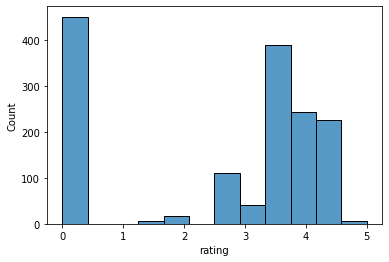

In [16]:
import seaborn as sns
sns.histplot(data.rating)

<AxesSubplot:xlabel='salary', ylabel='Count'>

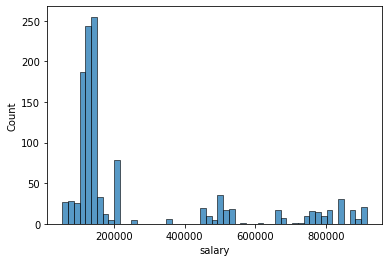

In [17]:
sns.histplot(data.salary)

In [18]:
sum(final_df.loc()[0][1:])

4.167510338886286

In [19]:
final_df

,text,0,1,2,3,4,5,6,7,8,...,258,259,260,261,262,263,264,265,rating,salary
0,"job descriptiondata scientist, marketingsan di...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640242,-0.472732
1,human was founded in 2012 in a brooklyn sci-fi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.526630,-0.607315
2,our maya team is expanding and we are looking ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.461575,-0.540968
3,what's the opportunity?recurrent is on a missi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.461575,-0.587113
4,fractal analytics is a strategic ai partner to...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.461575,-0.514395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,job title: information security data scientist...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.461575,1.098802
1481,we are looking for a data scientist to help us...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356213,NaN
1482,at edmunds we’re driven to make car buying eas...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469825,1.102837
1483,about one concern one concern brings disaster ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.461575,-0.527201


In [20]:
final_df.to_csv('../app/data/processed_data.csv', index= False)